In [1]:
import sys
import os
path_helper = ["c:\\","Users","vfriedrich","projects","gating","reproducibility_cleaned","helper"]
sys.path.append(os.path.join(*path_helper))
import helper_reproducibility as hr
import convexgating as cg
import scanpy as sc
import anndata as ann
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import colors
import seaborn as sb
import os
import re
from pywget import wget
print(sys.executable)


C:\Users\vfriedrich\Anaconda3\envs\gating_env_local_parameter_option\python.exe


In [2]:
#convexgating==0.1.1 #branch add_parameter_option

In [3]:
pre = 'COV02_run_gating'
start_time = hr.get_time()

In [4]:
path_input_data = hr.return_input_data_path() 
path_output_data = hr.return_output_data_path()
path_output_script = os.path.join(path_output_data,pre)
hr.make_path(os.path.join(path_output_script))

In [5]:
#DOWNLOAD
#link = "https://zenodo.org/record/5771937/files/data_Tcells_annotated.csv.gz"
#wget.download(link, path_input_data)

In [6]:
df_anno = pd.read_csv(os.path.join(path_input_data,"data_Tcells_annotated.csv.gz"), compression='gzip')

In [7]:
var_names = ['CD45',
       'CD3', 'CD19', 'CD15', 'CD8', 'TCRgd', 'CD62L', 'CD45RO', 'CD28',
       'CD27', 'CD226', 'ICOS', 'PD1', 'Lag3', 'TIGIT', 'CD96', 'CD25', 'CD56',
       'HLADR', 'CD38', 'CD137', 'CD69', 'Ki67', 'CXCR3', 'CXCR5', 'CCR6',
       'CRTH2', 'KLRB1', 'KLRG1', 'KLRF1', 'CD95', 'CD10', 'CD16', 'CD34',
       'CD123', 'CD11c', 'CD21', 'CD14', 'IgD', 'IgM']
adata_anno = ann.AnnData(X=df_anno[var_names], obs= df_anno[['cellid', 'Run', 'FCS.Filename', 'id', 'Individuals', 'Group',
       'Severity', 'Disease.phase', 'max. WHO scale', 'sev_merge',
       'Days.post.symptom.onset', 'Week', 'sev_week', 'followup', 'Tcellcompartment',
       'pheno_acute', 'metacluster_num', 'metacluster_name', 'new_clust_name',
       'new_clust_num']]) 

df_umap = df_anno[['UMAP1', 'UMAP2']]
df_umap.index = adata_anno.obs_names
adata_anno.obsm['X_umap'] = df_umap.to_numpy()

cofactor = 5
adata_anno.X = adata_anno.X/cofactor
adata_anno.X = np.arcsinh(adata_anno.X)

#----------------------------------------------------------------------------------------
adata_CV19 = adata_anno[adata_anno.obs['Group'] == 'CV19']

In [8]:
#run convex gating
cluster_string = 'new_clust_num'
subsample_factor = 15

In [9]:
# cluster C8

In [10]:
target_cluster = 'C8'
save = os.path.join(path_output_script,target_cluster)
adata_C8 = hr.get_subsample_fraction(adata_CV19,cluster_string,target_cluster,subsample_factor)

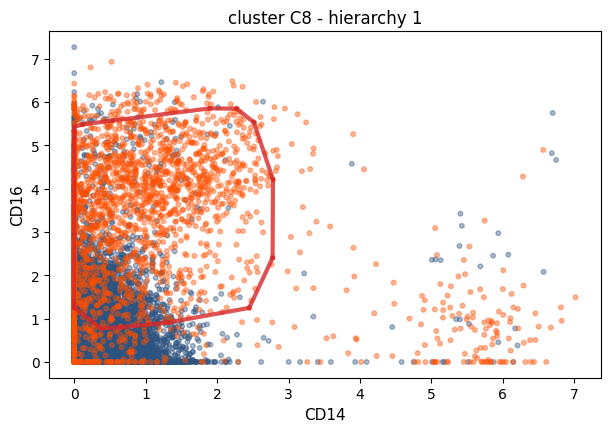

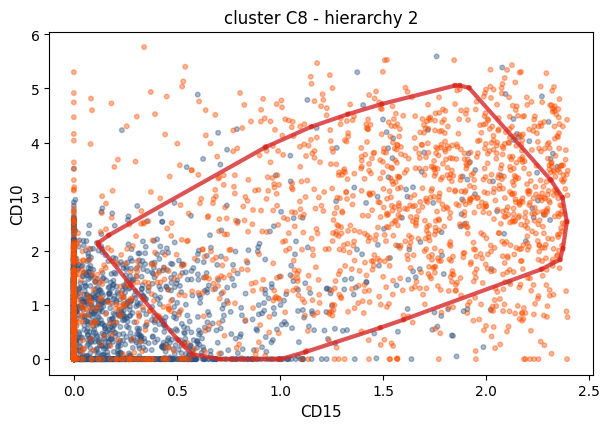

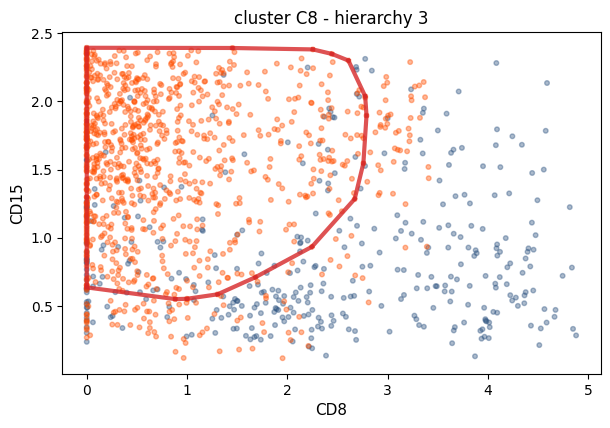

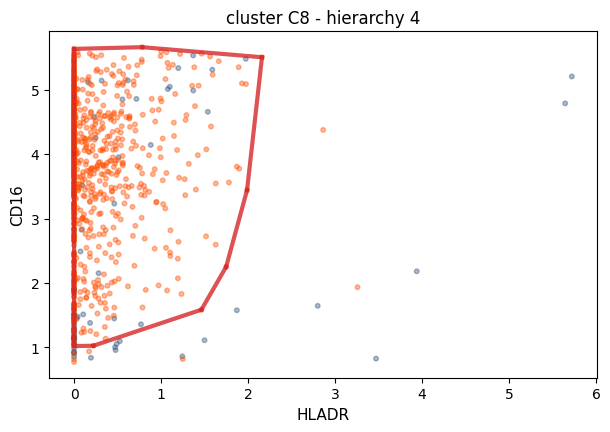

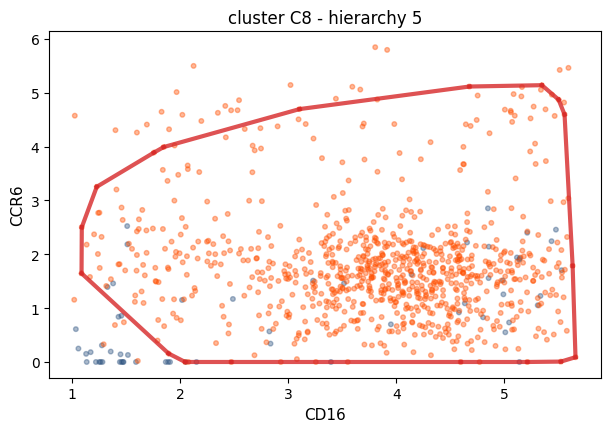

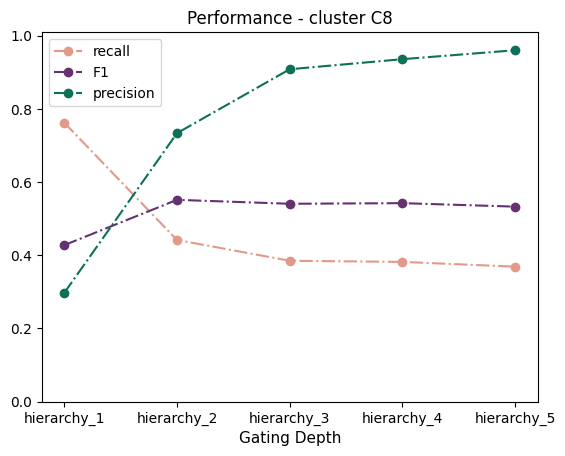

In [11]:
cg.tools.CONVEX_GATING(adata=adata_C8,
              cluster_numbers = [target_cluster],
              cluster_string = cluster_string,
              save_path=save,
              add_noise=True,
              update_anndata=False,
              focus="f1")

In [12]:
# cluster C26

In [13]:
target_cluster = 'C26'
save = os.path.join(path_output_script,target_cluster)
adata_C26 = hr.get_subsample_fraction(adata_CV19,cluster_string,target_cluster,subsample_factor)

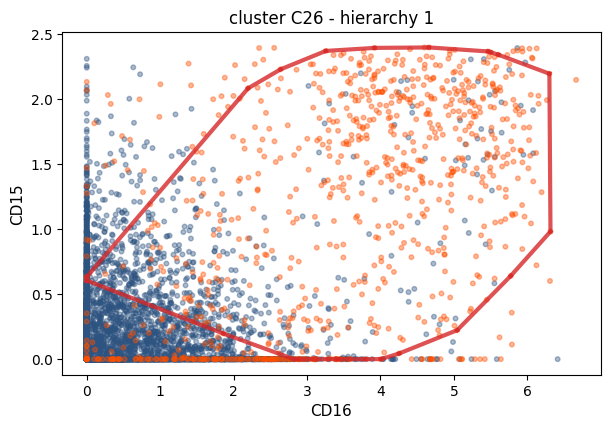

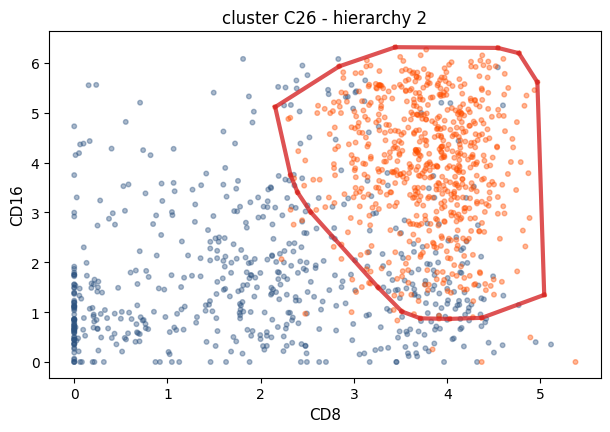

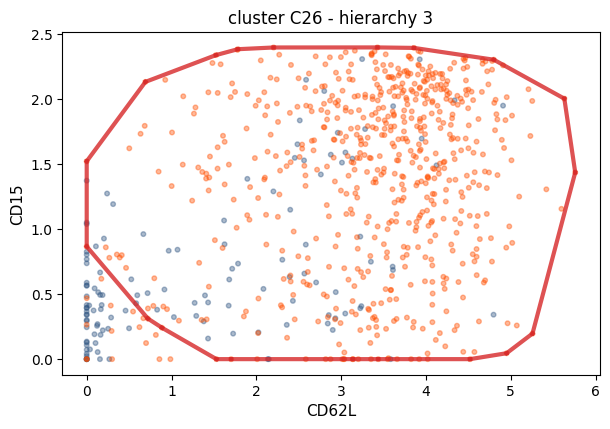

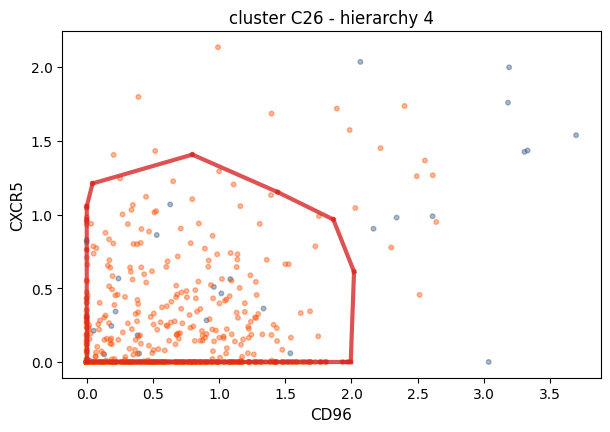

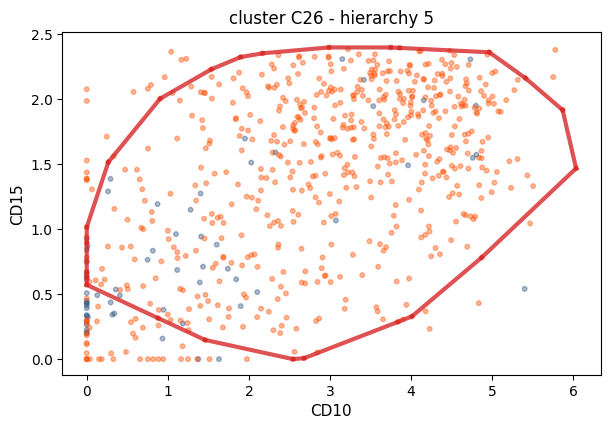

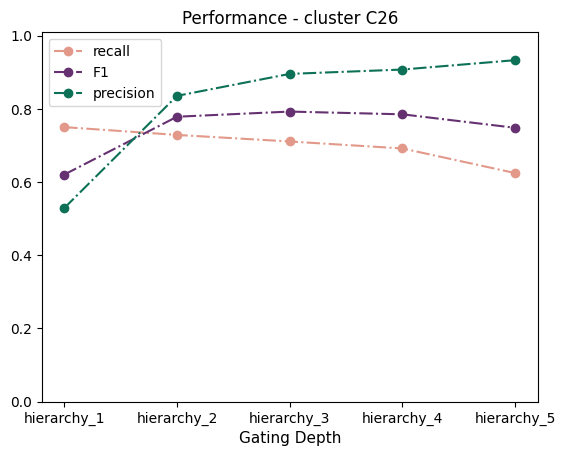

In [14]:
cg.tools.CONVEX_GATING(adata=adata_C26,
              cluster_numbers = [target_cluster],
              cluster_string = cluster_string,
              save_path=save,
              add_noise=True,
              update_anndata=False,
              focus="f1")

In [15]:
#cluster C7

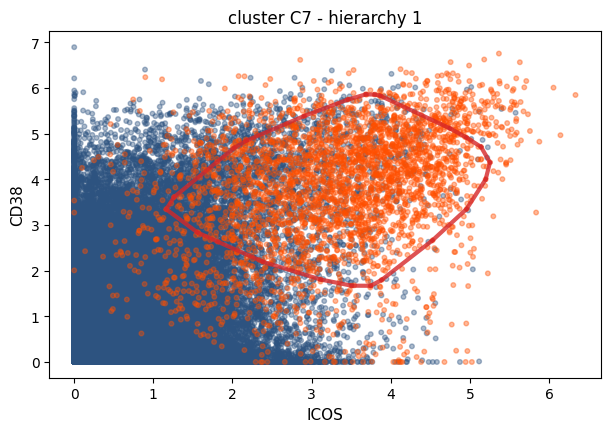

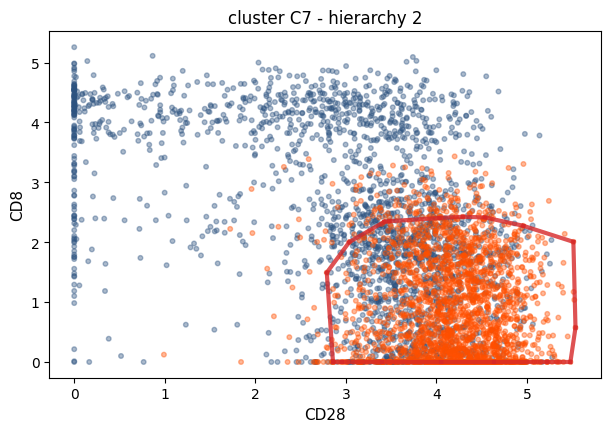

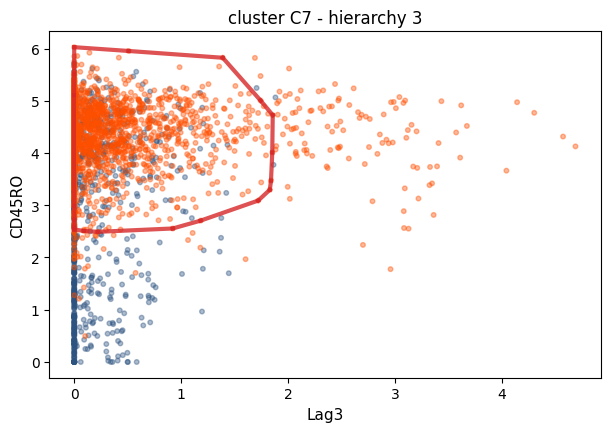

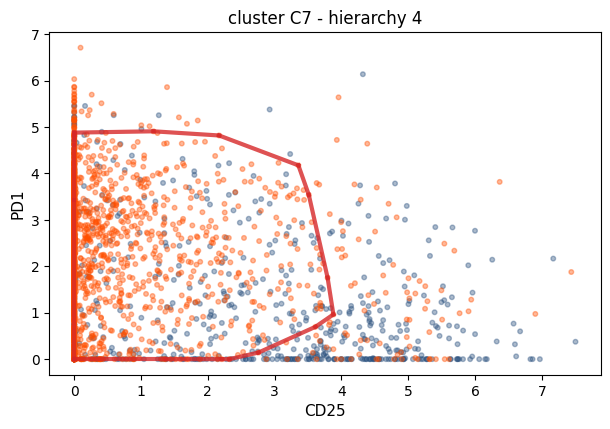

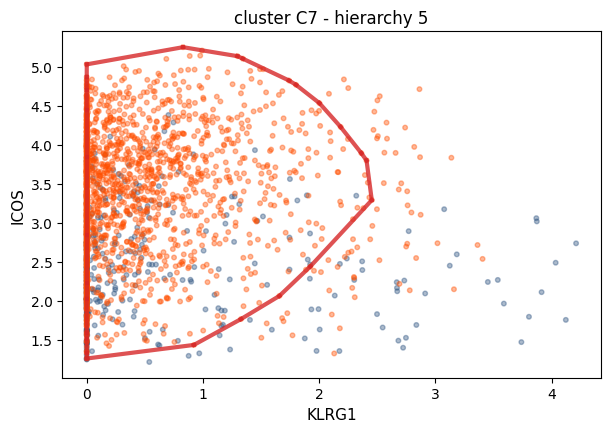

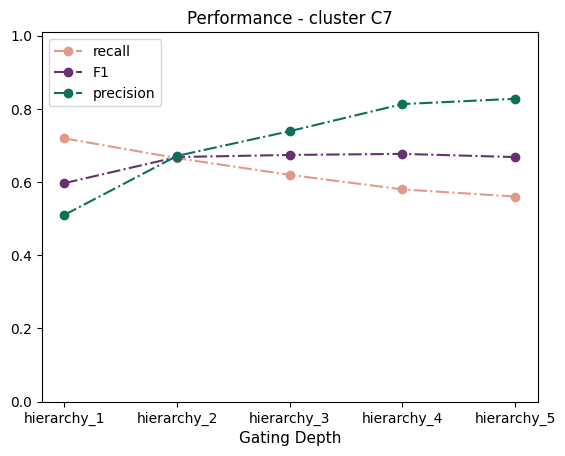

In [16]:
fraction = 1 / (subsample_factor + 1)
final_obs = 50000
target_cluster = 'C7'
save = os.path.join(path_output_script,target_cluster)

adata_C7 = hr.get_subsample_fraction_final_obs(adata_CV19,cluster_string,target_cluster,fraction,final_obs)

cg.tools.CONVEX_GATING(adata=adata_C7,
              cluster_numbers = [target_cluster],
              cluster_string = cluster_string,
              save_path=save,
              add_noise=True,
              update_anndata=False,
              focus="f1")

In [17]:
#cluster C25

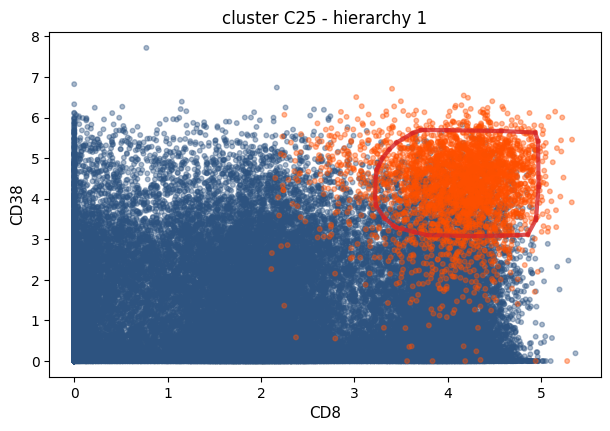

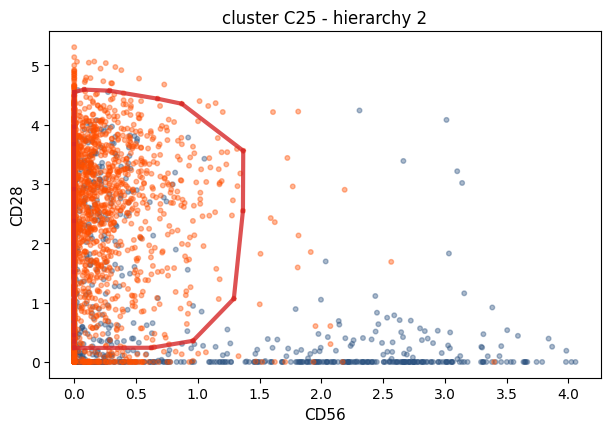

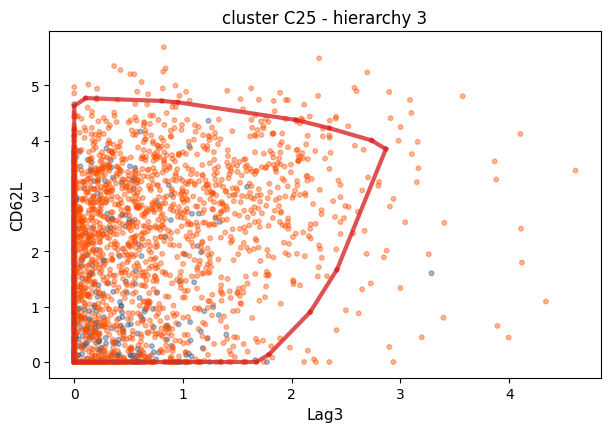

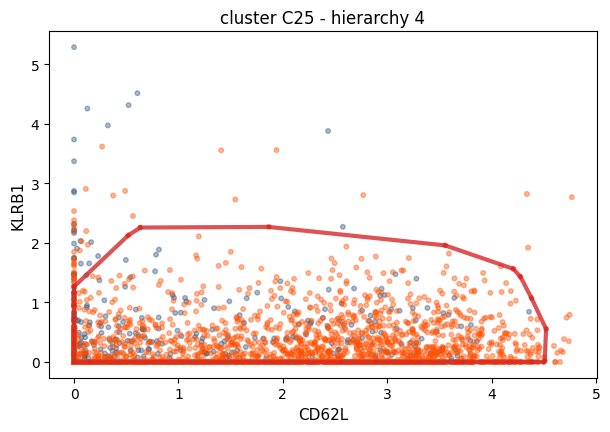

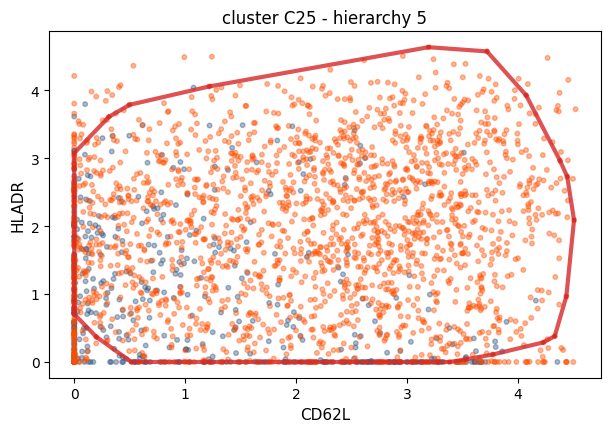

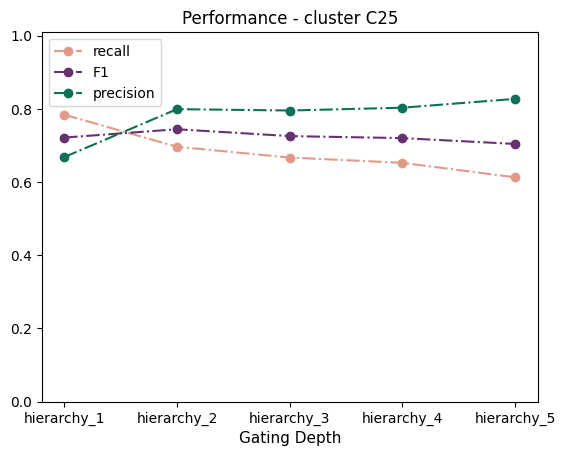

In [18]:
fraction = 1 / (subsample_factor + 1)
final_obs = 50000
target_cluster = 'C25'
save = os.path.join(path_output_script,target_cluster)

adata_C25 = hr.get_subsample_fraction_final_obs(adata_CV19,cluster_string,target_cluster,fraction,final_obs)

cg.tools.CONVEX_GATING(adata=adata_C25,
              cluster_numbers = [target_cluster],
              cluster_string = cluster_string,
              save_path=save,
              add_noise=True,
              update_anndata=False,
              focus="f1")

# Save session

In [19]:
hr.save_package_versions(hr.return_base_package_version_path(),pre = pre,do_print = True)
sc.logging.print_versions()
end_time = hr.get_time()
hr.get_time_delta(start_time,end_time,pre=pre,save=True)

babel==2.13.1
qtpy==2.4.1
sqlalchemy==2.0.23
send2trash==1.8.2
anyio==4.1.0
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
arrow==1.3.0
asttokens==2.4.1
async-lru==2.0.4
attrs==23.1.0
beautifulsoup4==4.12.2
bleach==6.1.0
certifi==2023.11.17
cffi==1.16.0
charset-normalizer==3.3.2
colorama==0.4.6
comm==0.2.0
debugpy==1.8.0
decorator==5.1.1
defusedxml==0.7.1
exceptiongroup==1.2.0
executing==2.0.1
fastjsonschema==2.19.0
fqdn==1.5.1
greenlet==3.0.1
idna==3.6
importlib-metadata==7.0.0
ipykernel==6.27.1
ipython==8.18.1
ipython-genutils==0.2.0
ipython-sql==0.5.0
ipywidgets==8.1.1
isoduration==20.11.0
jedi==0.19.1
json5==0.9.14
jsonpointer==2.4
jsonschema==4.20.0
jsonschema-specifications==2023.11.2
jupyter==1.0.0
jupyter-client==8.6.0
jupyter-console==6.6.3
jupyter-core==5.5.0
jupyter-events==0.9.0
jupyter-lsp==2.2.1
jupyter-server==2.11.2
jupyter-server-terminals==0.4.4
jupyterlab==4.0.9
jupyterlab-pygments==0.3.0
jupyterlab-server==2.25.2
jupyterlab-widgets==3.0.9
matplotlib-inline==0.1.6


datetime.timedelta(seconds=405, microseconds=199724)